<a href="https://colab.research.google.com/github/BigBroCat/Lab/blob/main/TD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

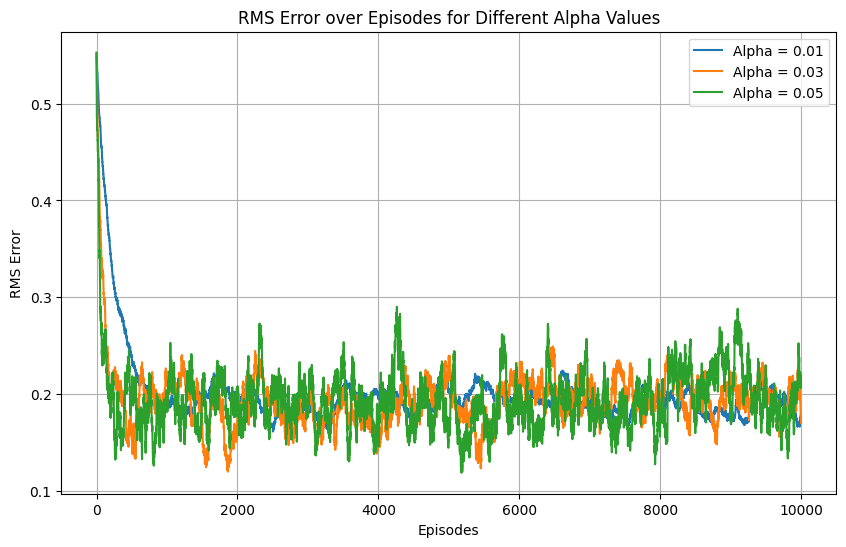

Estimated Value Function (Alpha = 0.01):
A: 0.0650
B: 0.1435
C: 0.2446
D: 0.4041
E: 0.6815

Estimated Value Function (Alpha = 0.03):
A: 0.0609
B: 0.1184
C: 0.2322
D: 0.4486
E: 0.7202

Estimated Value Function (Alpha = 0.05):
A: 0.0638
B: 0.1475
C: 0.2316
D: 0.3640
E: 0.6851



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
states = ["Terminal (Left)", "A", "B", "C", "D", "E", "Terminal (Right)"]
states_ABCDE= [ "A", "B", "C", "D", "E"]
num_states = len(states)
gamma = 0.9  # Discount factor
episodes = 10000  # Number of episodes
alpha_values = [0.01, 0.03, 0.05]  # Learning rates
true_values = [0.0, 1/6, 2/6, 3/6, 4/6, 5/6, 1.0]  # True state values for RMS calculation

# Rewards for each transition
rewards = {"Terminal (Left)": 0, "Terminal (Right)": 1}

# Transition function: random walk
def random_walk(state):
    if state == "Terminal (Left)" or state == "Terminal (Right)":
        return state, 0  # Terminal states are absorbing
    index = states.index(state)
    next_state = np.random.choice([states[index - 1], states[index + 1]])  # Left or Right
    reward = rewards.get(next_state, 0)
    return next_state, reward

# TD(0) learning
def td_learning(alpha):
    V = {state: 0.0 for state in states}  # Initialize value function
    rms_errors = []  # Store RMS errors
    for episode in range(episodes):
        # Start each episode at state C
        current_state = "C"
        while current_state not in ["Terminal (Left)", "Terminal (Right)"]:
            next_state, reward = random_walk(current_state)
            # TD(0) update
            V[current_state] += alpha * (reward + gamma * V[next_state] - V[current_state])
            current_state = next_state
        # Calculate RMS error for this episode
        rms_error = np.sqrt(np.mean([(V[states[i]] - true_values[i]) ** 2 for i in range(1, num_states - 1)]))
        rms_errors.append(rms_error)
    return V, rms_errors

# Run TD(0) for different alpha values and plot RMS errors
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    _, rms_errors = td_learning(alpha)
    plt.plot(range(episodes), rms_errors, label=f"Alpha = {alpha}")

# Plot formatting
plt.title("RMS Error over Episodes for Different Alpha Values")
plt.xlabel("Episodes")
plt.ylabel("RMS Error")
plt.legend()
plt.grid()
plt.show()

# Final estimated value functions
for alpha in alpha_values:
    V, _ = td_learning(alpha)
    print(f"Estimated Value Function (Alpha = {alpha}):")
    for state in states_ABCDE:
        print(f"{state}: {V[state]:.4f}")
    print()
